In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression/LinearX.npy
/kaggle/input/linear-regression/LinearY.npy


# Gradient Descent

In [6]:
import matplotlib.pyplot as plt

In [3]:
X = np.arange(10)
print(X)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# Let us assume some fn of X
Y = (X-5)**2
print(Y)

[25 16  9  4  1  0  1  4  9 16]


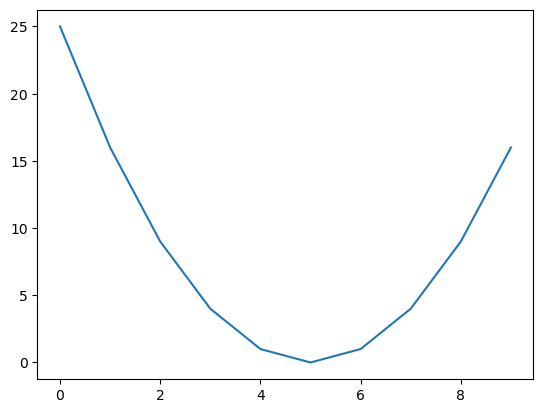

In [7]:
plt.plot(X,Y)
plt.show()

X : 1.80 Error 10.24000
X : 2.44 Error 6.55360
X : 2.95 Error 4.19430
X : 3.36 Error 2.68435
X : 3.69 Error 1.71799
X : 3.95 Error 1.09951
X : 4.16 Error 0.70369
X : 4.33 Error 0.45036
X : 4.46 Error 0.28823
X : 4.57 Error 0.18447
X : 4.66 Error 0.11806
X : 4.73 Error 0.07556
X : 4.78 Error 0.04836
X : 4.82 Error 0.03095
X : 4.86 Error 0.01981
X : 4.89 Error 0.01268
X : 4.91 Error 0.00811
X : 4.93 Error 0.00519
X : 4.94 Error 0.00332
X : 4.95 Error 0.00213
X : 4.96 Error 0.00136
X : 4.97 Error 0.00087
X : 4.98 Error 0.00056
X : 4.98 Error 0.00036
X : 4.98 Error 0.00023
X : 4.99 Error 0.00015
X : 4.99 Error 0.00009
X : 4.99 Error 0.00006
X : 4.99 Error 0.00004
X : 5.00 Error 0.00002
X : 5.00 Error 0.00002
X : 5.00 Error 0.00001
X : 5.00 Error 0.00001
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 Error 0.00000
X : 5.00 E

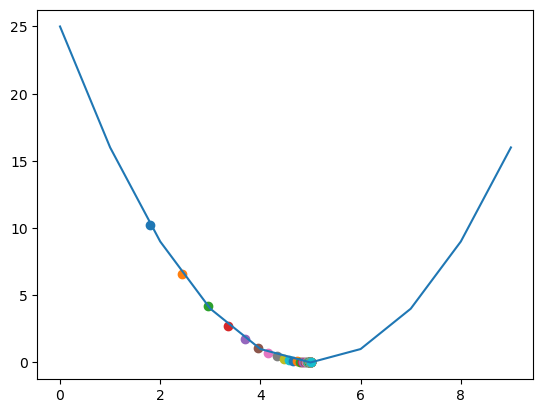

In [12]:
# Gradient Descent

plt.plot(X,Y)

x_ = 1
lr = 0.1
error=[]
for i in range(50):
    dy_dx = 2*(x_-5)
    x_ = x_ - (lr*dy_dx)
    y = (x_-5)**2
    
    print("X : %.2f Error %.5f"%(x_, y))
    error.append(y)
    plt.scatter(x_,y)
    
plt.show()

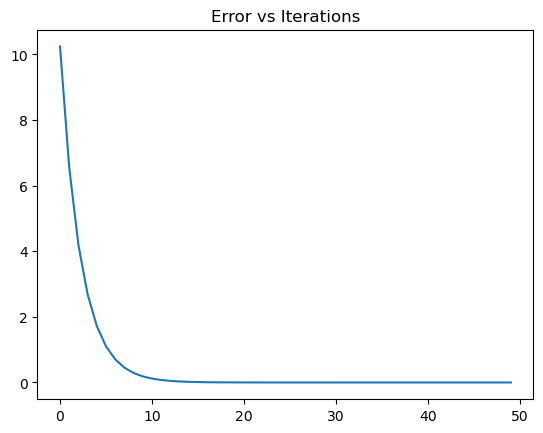

In [13]:
plt.plot(error)
plt.title("Error vs Iterations")
plt.show()

# Linear Regression

In [14]:
X = np.load('/kaggle/input/linear-regression/LinearX.npy') 
Y = np.load('/kaggle/input/linear-regression/LinearY.npy')

In [15]:
X = (X-X.mean())/X.std()

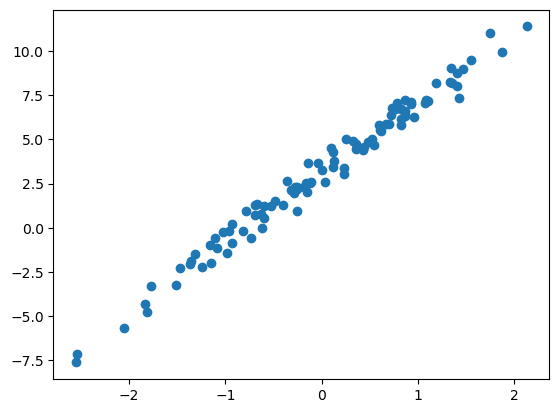

In [16]:
plt.scatter(X,Y)
plt.show()

In [17]:
print(X)

[-2.05079645e+00 -2.55057720e+00 -9.67279557e-01  8.21096319e-01
 -1.08501632e+00  1.22263792e-01 -1.51482751e+00  7.34003182e-01
  1.40774187e+00  1.06839251e+00 -4.85085757e-01 -4.06163102e-01
 -7.88064787e-01  1.87073406e+00 -6.74529725e-01 -1.36169293e+00
  6.92766242e-01  1.18061066e+00  8.24648928e-01  1.40573303e+00
  1.42775749e+00  8.24095044e-01 -1.82990943e+00  1.33680167e+00
 -1.16129682e+00  6.15136688e-01 -5.25248814e-01  3.56355771e-01
  6.02376759e-01 -1.63887085e-01 -2.83084386e-01  1.10121716e+00
 -1.12411076e-01  1.11839285e-01  7.64473195e-01  5.23194417e-01
  9.30868238e-01 -1.11134513e+00  8.63111499e-01  4.79362439e-01
  9.52343751e-01  3.69607447e-01 -2.73772646e-01  1.55038932e+00
 -1.15120024e+00 -9.30906790e-01  2.12943032e+00 -1.36538564e+00
  1.74242752e+00  6.63582532e-01 -6.92560715e-01 -6.04468023e-01
 -6.22131510e-01 -1.46708021e+00 -6.91170171e-01 -3.55794827e-01
 -6.26853850e-01  8.61740368e-01  1.32845253e+00 -1.24429912e+00
 -1.22263057e-01 -9.81282

In [18]:
def y_hat(theta, x):
    return theta[0] +theta[1]*x

def error(X, Y, theta):
    Y_ = y_hat(theta,X) # predicted values of y
    e = np.sum((Y_-Y)**2) # Mean Square Error
    m = X.shape[0]
    return e/m  


def getGrad(X, Y, theta):
    grad = np.zeros((2,))
    Y_ = y_hat(theta,X) # Predicted values of Y beased on current theta1 and theta2
    
    grad[0] = 2*np.sum(Y_ - Y)
    grad[1] = 2*np.sum((Y_ - Y)*X)
    
    m = X.shape[0]
    
    return grad/m  


def gradDescent(X,Y, lr=0.01):
    theta = np.zeros((2,)) # [0,0]
    
    error_list = []
    for i in range(200):
        grad = getGrad(X,Y,theta) # dy/dx
        theta = theta - lr*grad
        e = error(X,Y,theta) # Y = theta1*x + theta2 
        error_list.append(e)
        
    return theta, error_list

In [19]:
theta, error_list = gradDescent(X,Y)

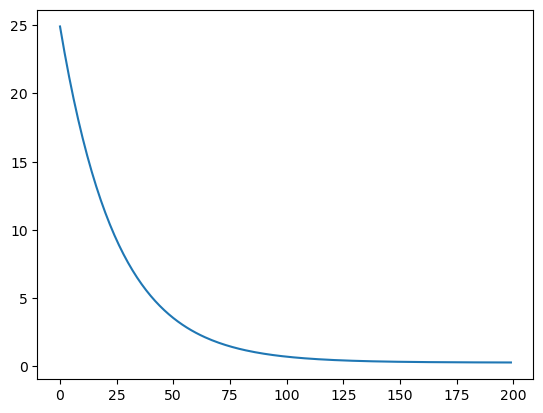

In [20]:
plt.plot(error_list)

In [21]:
theta

array([3.12159845, 3.87418873])

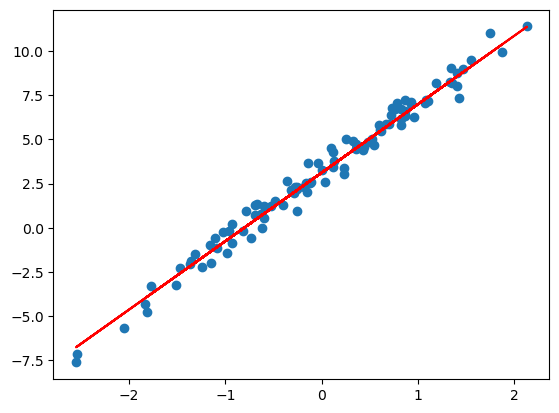

In [23]:
plt.scatter(X,Y)
Y_ = y_hat(theta, X)
plt.plot(X,Y_,color='red')
plt.show()

In [24]:
def prediction(question, theta=theta):
    return question*theta[1] + theta[0]

In [25]:
prediction(-1)

-0.752590275305661